In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [12]:
football_dataset = pd.read_csv("FIFA 2018 Statistics.csv")

In [13]:
football_dataset

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

shape = (100, 16)
n = shape[1]

np.random.seed(10)
X = np.random.randint(-5,6, size=shape) # Integers from -5 to 5
y = np.sum(X, axis=1) # Sum of each row
X = X + np.random.normal(0, .1, shape) # Add noise to input
#print(X)

In [15]:
X

array([[ 3.95366045, -1.04814099, -5.20264759, ...,  0.90643419,
        -0.95640407, -2.05352664],
       [-5.09924572, -1.10492116,  1.10925593, ...,  4.00194748,
         1.13905727,  3.98286689],
       [-3.95455609,  3.99690766, -1.00302227, ...,  2.09354857,
         3.10169064, -3.99101529],
       ...,
       [ 5.06695367, -4.94120836, -4.93795126, ..., -3.83558317,
         0.9951568 , -1.94576825],
       [ 2.9436277 ,  2.19463864,  2.12640052, ..., -2.87132841,
         3.92327854,  0.9485753 ],
       [-0.86787842,  3.94327948, -4.07984861, ...,  0.95564468,
         3.21299247, -4.09478498]])

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y), reg.coef_

(0.9993316174977624,
 array([0.98231329, 1.00293103, 1.01089872, 0.99780244, 1.01754801,
        1.01399901, 1.01117047, 1.0116978 , 0.97996713, 1.0128416 ,
        1.00504136, 1.01933667, 0.98243754, 0.98514289, 1.0177332 ,
        1.00559587]))

In [17]:
import itertools
import math

def divisive_shap_approx(X, y, model, beta, gamma_n, gamma_d, num_partitions):
    if X.shape[1] > np.emath.logn(beta, n):
        partitions = []
        sum_gamma_n = 0
        sum_gamma_d = 0
        for _ in range(num_partitions):
            split_S = partition(X,y)
            partitions.append(split_S)
            sum_gamma_n += value(X, y, model)
            sum_gamma_d += sum([value(Xi, yi, model) for Xi, yi in split_S])
        gamma_n = gamma_n * (sum_gamma_n / num_partitions)
        gamma_d = gamma_d * (sum_gamma_d / num_partitions)
        return union([divisive_shap_approx(Xi, 
                                           yi, 
                                           model,
                                           beta,
                                           gamma_n, 
                                           gamma_d,
                                           num_partitions) for Xi, yi in split_S])
    else:
        shap = shapley_true(X, y, model)
        shap = shap*gamma_n/gamma_d
        return (X, y, shap)

def value(X, y, model):
    if X.size == 0:
        return 0
    else:
        reg = model.fit(X, y)
        return reg.score(X, y)
        

def findsubsets(s, n):
    return list(itertools.combinations(s, n))


def shapley_true(X, y, model):
    """Returns true shapley value of each feature (numpy array)"""
    N = X.shape[1]
    shap = np.zeros(N)
    for i in range(N):
        other_features = set(range(N))
        other_features.remove(i)
        subsets = [subset for j in range(N) for subset in findsubsets(other_features, j)]
        for subset in subsets:
            coeff = math.factorial(len(subset))*math.factorial(N - len(subset) - 1)/math.factorial(N)
            shap[i] += coeff*(value(X[:,list(subset) + [i]], y, model)-value(X[:, list(subset)], y, model))
    return np.array(shap)

def partition(X, y):
    """Returns list of tuples: [(X1, Y1), (X2, Y2), ...]"""
    #N = X.shape[1]
    #return [(X[:,:N//2], y), (X[:,N//2:], y)]

    split_results = []
    X_train, X_test = train_test_split(X.T, test_size=0.5, )#random_state=42)
    return [(X_train.T, y), (X_test.T, y)]

def union(S_split):
    """Returns the union of several sets (Xi, Yi, Shapi)"""
    X = S_split[0][0]
    y = S_split[0][1]
    shap = S_split[0][2]
    for Xi, _, shapi in S_split[1:]:
        X = np.concatenate((X, Xi), axis=1)
        shap = np.concatenate((shap, shapi))
    return (X, y, shap)

In [18]:
def main(X, y, model, beta, num_partitions = 1):
    X2, y2, shap = divisive_shap_approx(X, y, model, beta, 1, 1, num_partitions)
    w = sum(shap)
    vN = value(X, y, model)
    if w != vN:
        if w == 0:
            shap = np.array([vN/X.shape[1]]*X.shape[1])
        gamma = vN/w
        shap = shap*gamma
    return (X2, y2, shap)

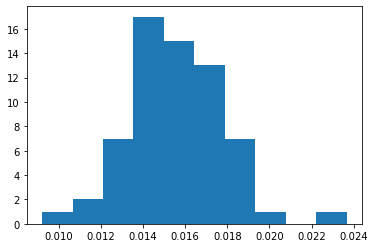

In [19]:
shape = (10000, 64)
n = shape[1]

np.random.seed(10)
X = np.random.randint(-5,6, size=shape) # Integers from -5 to 5
y = np.sum(X, axis=1) # Sum of each row
X = X + np.random.normal(0, .1, shape) # Add noise to input

X, y, shap = main(X, y, LinearRegression(), n**(1/np.sqrt(n)))

plt.hist(shap)
plt.show()

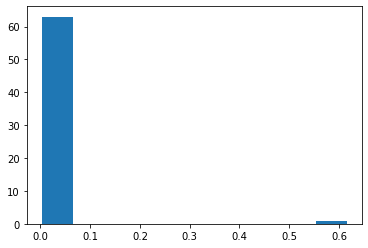

In [20]:
shape = (10000, 64)
n = shape[1]

np.random.seed(10)
X = np.random.randint(-5,6, size=shape) # Integers from -5 to 5
X[:,0] = X[:,0]*10
y = np.sum(X, axis=1) # Sum of each row
X = X + np.random.normal(0, .1, shape) # Add noise to input

X, y, shap = main(X, y, LinearRegression(), n**(1/np.sqrt(n)))

plt.hist(shap)
plt.show()

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [22]:
df = pd.read_csv('FIFA 2018 Statistics.csv')

# Select columns with dtype np.int64 or np.float64
#selected_columns = df.select_dtypes(include=[np.int64, np.int64]).columns

# Apply Min-Max scaling to the selected columns
#df[selected_columns] = MinMaxScaler().fit_transform(df[selected_columns])
#df = df.fillna(0)

y = (df['Man of the Match'] == "Yes") 
y = [1 if label == True else 0 for label in y]
feature_names = [i for i in df.columns if df[i].dtype in [np.int64, np.int64]]
X = df[feature_names]


X_norm = MinMaxScaler().fit_transform(X)
train_X, val_X, train_y, val_y = train_test_split(X_norm, y, random_state=1)
X

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,0


In [23]:
FIFA_cols = ['Goals',	'Ball Poss. %',	'Attempts', 'On-Target',	'Off-Target',	'Blocked',	'Corners',	'Offs' ]

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(train_X, train_y)
test_predictions = log_reg.predict(val_X)
log_reg.score(val_X, val_y), reg.coef_

(0.71875,
 array([0.98231329, 1.00293103, 1.01089872, 0.99780244, 1.01754801,
        1.01399901, 1.01117047, 1.0116978 , 0.97996713, 1.0128416 ,
        1.00504136, 1.01933667, 0.98243754, 0.98514289, 1.0177332 ,
        1.00559587]))

In [31]:
from sklearn.ensemble import RandomForestClassifier

tree_model = RandomForestClassifier().fit(train_X, train_y)
tree_model.score(val_X, val_y)


0.6875

In [43]:
 pip install shap

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.cluster import KMeans
def main2(X, y, model, beta,k, num_partitions):
    X2, y2, shap = divisive_shap_approx_knn(X, y, model, beta, 1, 1,k, num_partitions)
    w = sum(shap)
    vN = value(X, y, model)
    if w != vN:
        if w == 0:
            shap = np.array([vN/X.shape[1]]*X.shape[1])
        gamma = vN/w
        shap = shap*gamma
    return (X2, y2, shap)
def divisive_shap_approx_knn(X, y, model, beta, gamma_n, gamma_d,k, num_partitions):
    if X.shape[1] > max(np.emath.logn(beta, n), k):

        partitions = []
        sum_gamma_n = 0
        sum_gamma_d = 0
        for _ in range(num_partitions):
            split_S = partition_knn(X,y,k)
            partitions.append(split_S)
            sum_gamma_n += value(X, y, model)
            sum_gamma_d += sum([value(Xi, yi, model) for Xi, yi in split_S])
        gamma_n = gamma_n * (sum_gamma_n / num_partitions)
        gamma_d = gamma_d * (sum_gamma_d / num_partitions)
        return union([divisive_shap_approx_knn(Xi, 
                                               yi, 
                                               model,
                                               beta,
                                               gamma_n, 
                                               gamma_d,
                                               k,
                                               num_partitions) for Xi, yi in split_S])

    else:
        shap = shapley_true(X, y, model)
        shap = shap*gamma_n/gamma_d
        return (X, y, shap)
def partition_knn(X,y,k):

    transposed_X = X.T

    kmeans = KMeans(
        init="random",
        n_clusters=k,
        n_init=10,
        max_iter=300,
        #random_state=42
    )
    kmeans.fit(transposed_X)
    labels = kmeans.labels_
    X = transposed_X.T
    partitions = []
    X = pd.DataFrame(X)
    for i in range(k):
        partitions.append((np.array(X.iloc[:,labels == i]),y))
      
    return partitions     


In [55]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('FIFA 2018 Statistics.csv')

# Select columns with dtype np.int64 or np.float64
#selected_columns = df.select_dtypes(include=[np.int64, np.int64]).columns

# Apply Min-Max scaling to the selected columns
#df[selected_columns] = MinMaxScaler().fit_transform(df[selected_columns])
#df = df.fillna(0)

y = (df['Man of the Match'] == "Yes") 
y = [1 if label == True else 0 for label in y]
feature_names = [i for i in df.columns if df[i].dtype in [np.int64, np.int64]]
X = df[feature_names]


X_norm = MinMaxScaler().fit_transform(X)
train_X, val_X, train_y, val_y = train_test_split(X_norm, y, random_state=1)
X

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,0


In [67]:
X

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Goals in PSO
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,0


In [71]:
FIFA_cols = X.columns.tolist()
FIFA_cols

['Goal Scored',
 'Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 'Fouls Committed',
 'Yellow Card',
 'Yellow & Red',
 'Red',
 'Goals in PSO']

In [72]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(train_X, train_y)
test_predictions = log_reg.predict(val_X)
log_reg.score(val_X, val_y), reg.coef_

(0.71875,
 array([0.98231329, 1.00293103, 1.01089872, 0.99780244, 1.01754801,
        1.01399901, 1.01117047, 1.0116978 , 0.97996713, 1.0128416 ,
        1.00504136, 1.01933667, 0.98243754, 0.98514289, 1.0177332 ,
        1.00559587]))

In [73]:
from sklearn.ensemble import RandomForestClassifier

tree_model = RandomForestClassifier().fit(train_X, train_y)
tree_model.score(val_X, val_y)

0.6875

In [102]:
train_X.shape

(96, 18)

In [74]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# Calculate Shap values
shap_values = explainer.shap_values(train_X)[0]

In [75]:
arr1 = np.absolute(np.mean(shap_values, axis = 0))

print(arr1)

[0.00135237 0.00152377 0.00018893 0.00185432 0.00272965 0.00284522
 0.00664215 0.00070139 0.00053136 0.00142985 0.00400519 0.00433173
 0.00094157 0.00206796 0.00050287 0.         0.00042758 0.00034392]


In [76]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[6], train_X[6])

In [77]:
print(shap_values)

[[ 2.63430505e-01 -2.21623023e-03  3.38189025e-02 ...  0.00000000e+00
  -2.71024563e-04  9.58411890e-04]
 [ 2.90629194e-01 -2.71236871e-03 -1.99462235e-02 ...  0.00000000e+00
  -3.91705531e-04  1.09724186e-03]
 [-7.55085469e-02  2.60651482e-02 -5.83896078e-02 ...  0.00000000e+00
  -1.20787778e-03  9.25619253e-04]
 ...
 [ 2.68089636e-01 -2.38916236e-03 -3.23953388e-02 ...  0.00000000e+00
  -4.57134347e-04  1.11893884e-03]
 [-8.41466521e-02  2.21744020e-02  8.32649884e-03 ...  0.00000000e+00
  -3.79928270e-04  2.01046959e-03]
 [ 2.59629628e-01 -4.86831034e-03  4.73880691e-02 ...  0.00000000e+00
  -2.36956060e-04  1.53848234e-03]]


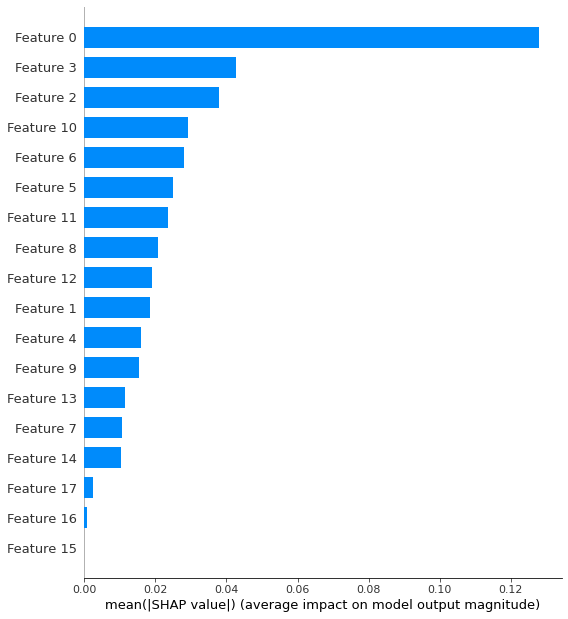

In [78]:
shap.summary_plot(shap.TreeExplainer(tree_model).shap_values(train_X)[0], train_X, plot_type="bar")

In [79]:
from tqdm import tqdm

N = X.shape[1]
shap = np.zeros(N)
for i in tqdm(range(N)):
    other_features = set(range(N))
    other_features.remove(i)
    subsets = [subset for j in range(N) for subset in findsubsets(other_features, j)]
    for subset in subsets:
        coeff = math.factorial(len(subset))*math.factorial(N - len(subset) - 1)/math.factorial(N)
        shap[i] += coeff*(value(X_norm[:,list(subset) + [i]], y, reg)-value(X_norm[:, list(subset)], y, reg))
true_shapley = np.array(shap)
print(true_shapley)

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [43:24<00:00, 144.70s/it]

[0.21884741 0.00277083 0.01387243 0.03323474 0.01166397 0.01254767
 0.02071686 0.00024238 0.00839717 0.00350549 0.00281172 0.00249446
 0.00135133 0.01039441 0.00996229 0.00028225 0.00878747 0.00271532]


In [80]:
true_shapley

array([0.21884741, 0.00277083, 0.01387243, 0.03323474, 0.01166397,
       0.01254767, 0.02071686, 0.00024238, 0.00839717, 0.00350549,
       0.00281172, 0.00249446, 0.00135133, 0.01039441, 0.00996229,
       0.00028225, 0.00878747, 0.00271532])

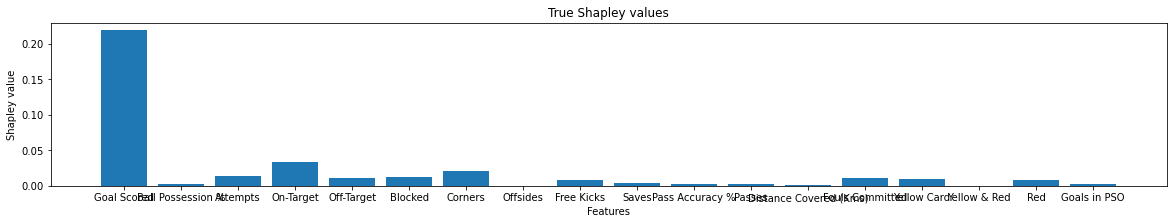

In [81]:
plt.figure(figsize=(20, 3))  # Adjust the figure size as desired
plt.bar(FIFA_cols, true_shapley)
plt.xlabel('Features')
plt.ylabel('Shapley value')
plt.title('True Shapley values')
plt.show()

In [83]:
from sklearn.metrics.pairwise import cosine_similarity

In [84]:
cosine_sim = cosine_similarity([true_shapley], [arr1])[0][0]
print(cosine_sim)

0.2686263878631952


0.05486250192926798


<BarContainer object of 18 artists>

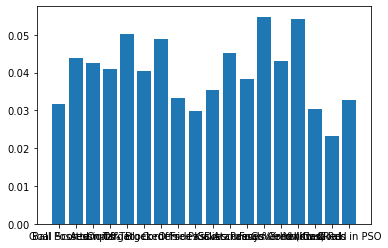

In [85]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

n = train_X.shape[1]
X2, y2, shap = main(np.array(train_X), np.array(train_y), log_reg, n**(1/np.sqrt(n)), 100)
# Compute the RMSE
#print(shap)
mse = mean_squared_error(true_shapley, shap)
rmse = np.sqrt(mse)
print(rmse)
#cosine_sim = cosine_similarity([arr1], [shap])[0][0]
#print(cosine_sim)
#cosine_sim = cosine_similarity([true_shapley], [shap])[0][0]
#print(cosine_sim)
#plt.plot(shap)
plt.bar(X.columns, shap)

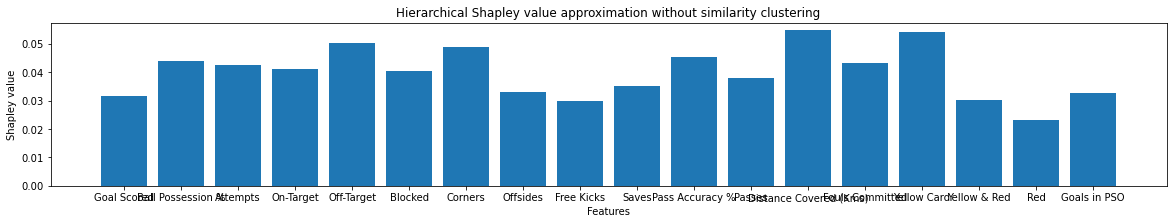

In [86]:
plt.figure(figsize=(20, 3))  # Adjust the figure size as desired
plt.bar(FIFA_cols, shap)
plt.xlabel('Features')
plt.ylabel('Shapley value')
plt.title('Hierarchical Shapley value approximation without similarity clustering')
plt.show()

0.05231567849108539


<BarContainer object of 18 artists>

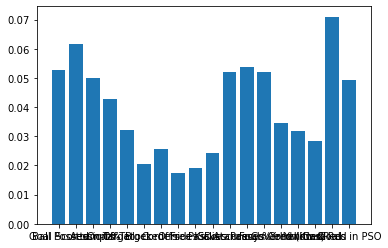

In [87]:
n = train_X.shape[1]
X2, y2, shap_knn = main2(np.array(train_X), np.array(train_y), log_reg, n**(1/np.sqrt(n)),2, 1)
#print(shap_knn)
mse_knn = mean_squared_error(true_shapley, shap_knn)
rmse_knn = np.sqrt(mse_knn)
print(rmse_knn)

#cosine_sim = cosine_similarity([arr1], [shap_knn])[0][0]
#print(cosine_sim)
cosine_sim = cosine_similarity([true_shapley], [shap_knn])[0][0]
#print(cosine_sim)
#plt.plot(shap_knn)
plt.bar(X.columns, shap_knn)

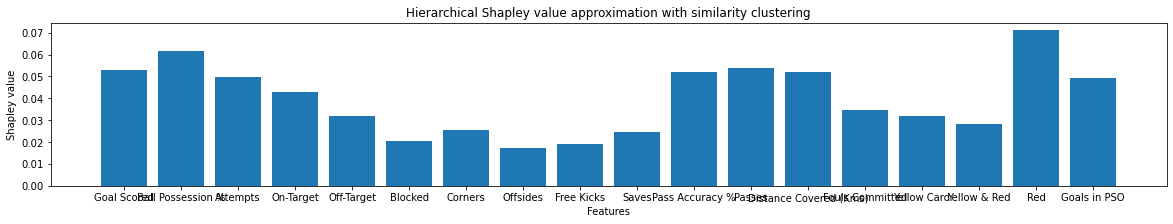

In [88]:
# Plotting
plt.figure(figsize=(20, 3))  # Adjust the figure size as desired
plt.bar(FIFA_cols, shap_knn)
plt.xlabel('Features')
plt.ylabel('Shapley value')
plt.title('Hierarchical Shapley value approximation with similarity clustering')
plt.show()


0.055009386186180044
0.358780316544018
0.050335807923181576
0.4727726973157871
0.05027951053485387
0.4648229584737014
0.05346126353240909
0.3693956553609467
0.05666646660742547
0.33234872929057885
0.054496013451558
0.4101738790678497
0.05778648211462555
0.3310235588472515
0.0482387656944381
0.5246530301794018
0.05058094804637485
0.4705208074976063
0.05233260093507388
0.43534210178378485
0.058633100258370166
0.26883396088245914
0.05314663683669102
0.3969176847157333
0.052399700900389465
0.41318742543064113
0.05760012517102933
0.2714518182730401
0.0518108008849724
0.4136645299106953
0.05646471053134854
0.29300325583553233


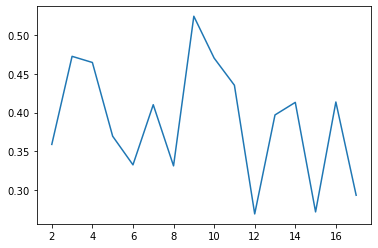

In [89]:
import matplotlib.pyplot as pl 
k_vals = []
rmse_vals = []
sim_vals = []
for i in range(2,18):
    X2, y2, shap_knn = main2(np.array(train_X), np.array(train_y), log_reg, n**(1/np.sqrt(n)),i, 100)
    mse_knn_test = mean_squared_error(true_shapley, shap_knn)
    rmse_knn_test = np.sqrt(mse_knn_test)
    k_vals.append(i)
    rmse_vals.append(rmse_knn_test)
    print(rmse_knn_test)
    cosine_sim = cosine_similarity([true_shapley], [shap_knn])[0][0]
    sim_vals.append(cosine_sim)
    print(cosine_sim)

pl.plot(k_vals,sim_vals)

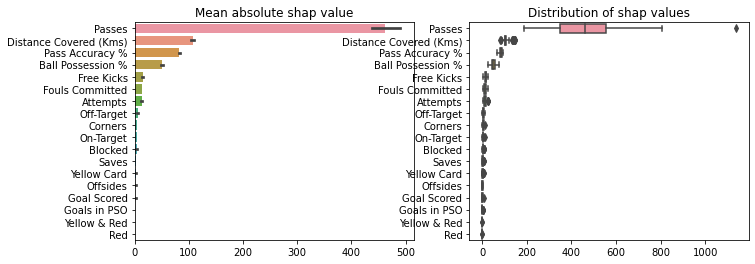

In [92]:
columns = X.apply(np.abs).mean()\
                 .sort_values(ascending=False).index
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=X[columns].apply(np.abs), orient='h', 
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=X[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

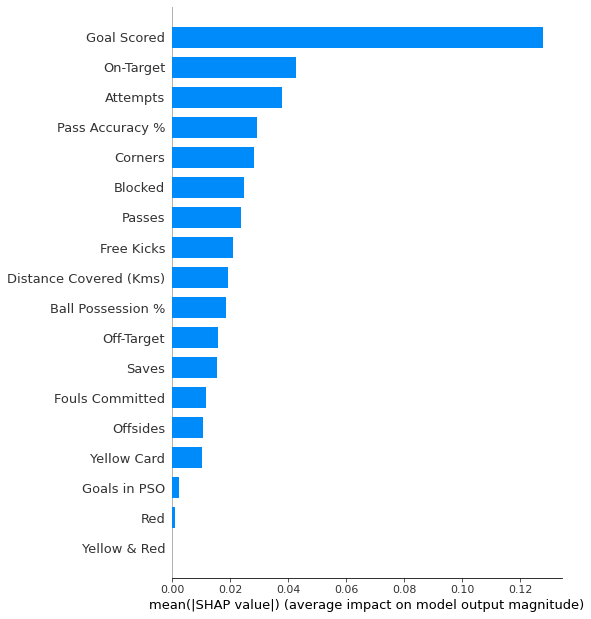

In [95]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already calculated the SHAP values and stored them in the shap_values variable

# Plot the SHAP values as a bar plot
shap.summary_plot(shap_values, X, plot_type="bar")

# Show the plot
plt.show()


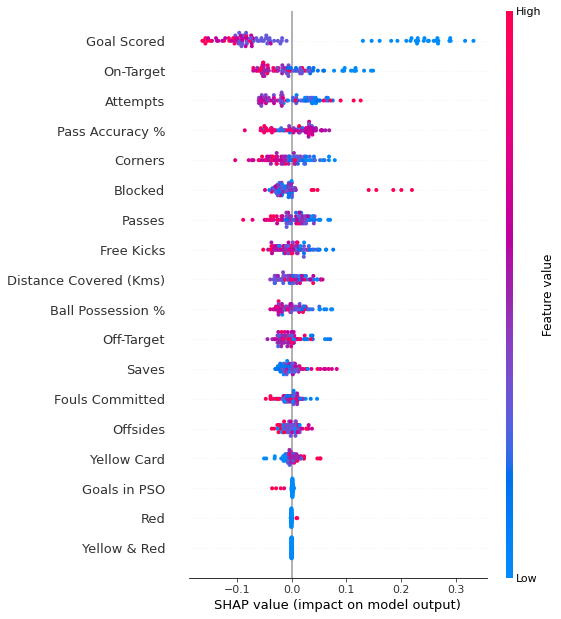

In [103]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already calculated the SHAP values and stored them in the shap_values variable
# Assuming you have a list of feature names stored in feature_names

# Plot the SHAP values with feature names
shap.summary_plot(shap_values, train_X, feature_names=feature_names)

# Show the plot
plt.show()


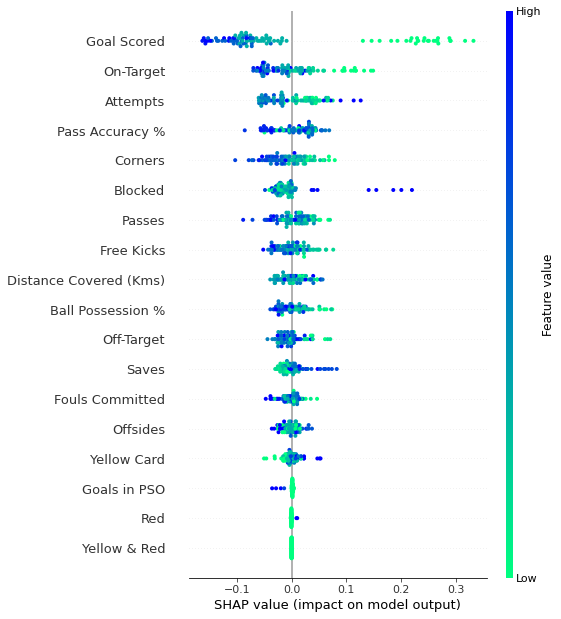

In [106]:
shap.summary_plot(shap_values,train_X,feature_names=feature_names, cmap=plt.get_cmap("winter_r"))

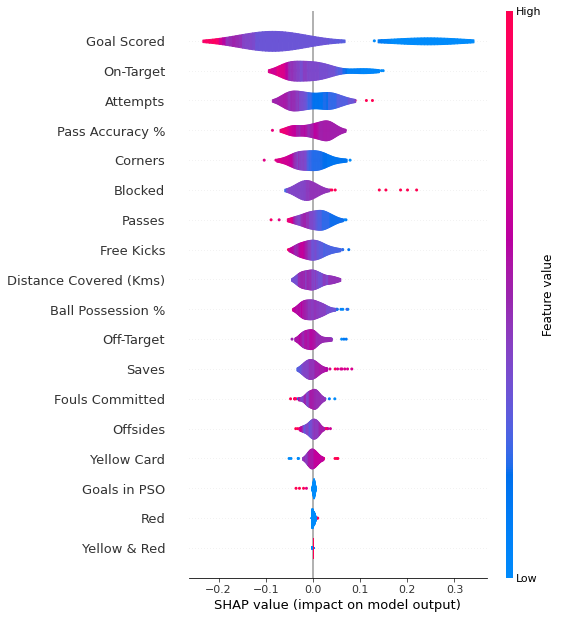

In [108]:
shap.summary_plot(shap_values,train_X,feature_names=feature_names ,plot_type='violin')

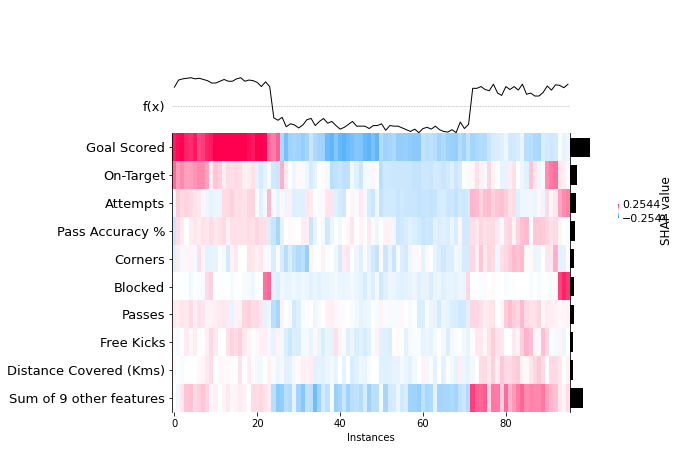

In [128]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated the SHAP values and stored them in the shap_values variable
# Assuming you have a list of feature names stored in the feature_names variable

# Create a shap.Explanation object
shap_explanation = shap.Explanation(values=shap_values, data=train_X, feature_names=feature_names)

# Plot the SHAP values as a heatmap
shap.plots.heatmap(shap_explanation)

# Show the plot
plt.show()


In [135]:
shap.force_plot(explainer.expected_value[0],shap_values[0],)